In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import os
import sys
from typing import Tuple

from dataclasses import dataclass

if '' in sys.path:
    sys.path.remove('')

module_path = os.path.abspath(os.path.join('../python'))
if module_path not in sys.path:
    sys.path.append(module_path)

import networkx as nx

from graphPlot import drawGraph, setCanvas
from const import *

setCanvas()

## G-ConvNet

$$f_+(y) = <A_{ug} \circ f(x), w_0(x)> _x$$

- this implies bijection/isomorphism $y \longleftrightarrow A_{ug}$
- ... and high-level features usually have more dimensions $\{x\} \subset \{y\}$

---

All of the followings are concrete subclasses:


Augmentation types | Answer
 --- | --- 
2d translation | ConvNet
**others** | **G-ConvNet**
- 2d translation + 90$^{\circ}$ rotation | Group Equivariant CNNs
- 2d translation + rotation | Harmonic Net
- 3d rotation | Spherical CNNs
- 3d translation + rotation | Tensor Field Net



## ConvNet

| - | Input $f(x)$ | High-level $f_+(y)$, $f_{++}(z)$, ... | Augmentation $A_{ug}$, $U_{ga}$, ...
| ---|---------------|----------------|-------------------------------
| domain | $R^2$         | $R^2$          | $R^2$ (translation only)

---

- First of its kind but not the last
- A rare case when high-level feature domain $\{y\} = \{x\}$, in all other cases $\{y\} \supset \{x\}$

<img src="assets/alexnet.png">


## ConvNet

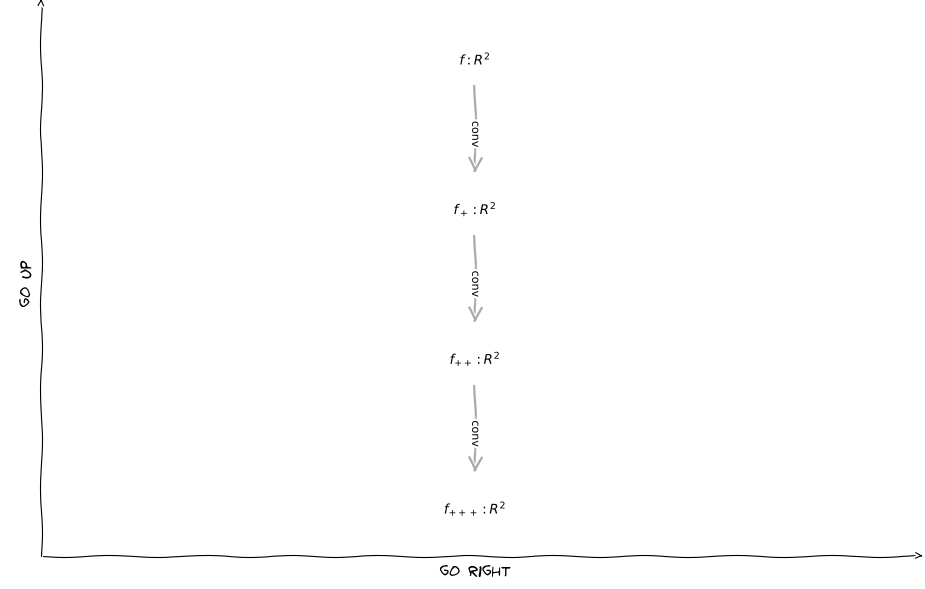

In [5]:
g = nx.DiGraph(directed=True)

nodes = [
    "$f: R^2$",
    "$f_+: R^2$",
    "$f_{++}: R^2$",
    "$f_{+++}: R^2$"
]

for i in range(0, len(nodes) - 1):
    g.add_edge(nodes[i], nodes[i + 1], text="conv")

drawGraph(g)

plt.show()

## Group Equivariant CNNs (ICML 2016*)

| - | Input $f(x)$ | High-level $f_+(y)$, $f_{++}(z)$, ... | Augmentation $A_{ug}$, $U_{ga}$, ...
| --- |---|---|---
| domain | $R^2$ | $R^2 \times p4$ | $R^2 \times p4$ (translation, rotation $\pm 90^{\circ}$)

---

- change looks trivial

<img src="assets/r2p4.png" width="500">

---

[*] T. S. Cohen and M. Welling, “Group Equivariant Convolutional Networks,” ICML 2016.

## Group Equivariant CNNs (ICML 2016*)

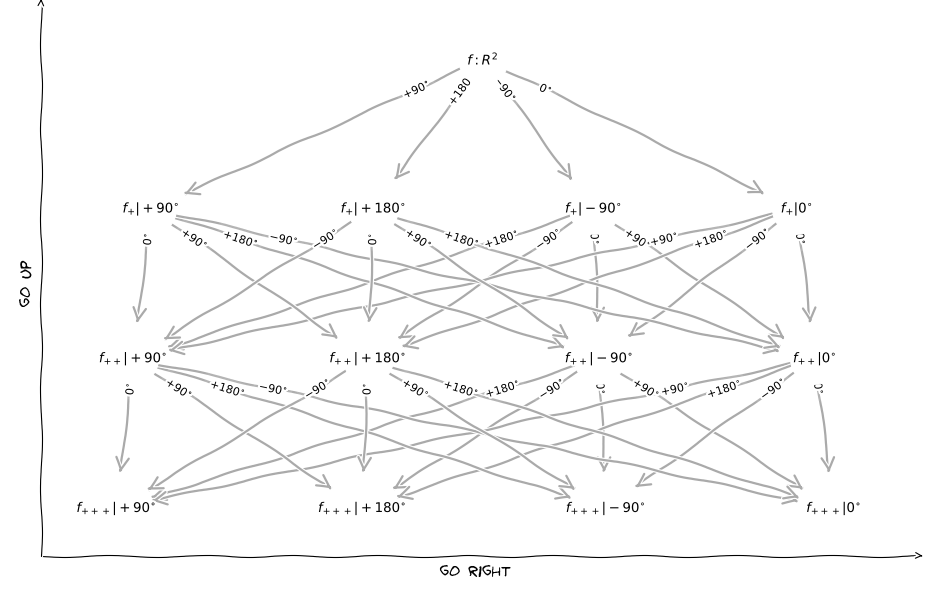

In [6]:
g = nx.DiGraph(directed=True)

tail = "$f: R^2$"

angles = [-90, 0, 90, 180]


def regularize(v: int) -> int:
    if v > 180:
        return regularize(v - 360)
    elif v <= -180:
        return regularize(v + 360)
    else:
        return v


def repr(v: int) -> str:
    r = regularize(v)
    if r > 0:
        return f"+{str(r)}^{{\circ}}"
    else:
        return f"{str(r)}^{{\circ}}"


sub = "+"
subPlus = ""

for i in angles:
    node = f"$f_{{{sub}}} | {repr(i)}$"
    g.add_edge(tail, node, text=f"${repr(i)}$")

for epoch in range(1, 3):
    subPlus = f"{sub}+"
    for i in angles:
        for j in angles:
            prev = f"$f_{{{sub}}} | {repr(i)}$"
            node = f"$f_{{{subPlus}}} | {repr(j)}$"
            g.add_edge(prev, node, text=f"${repr(j - i)}$")
    sub = subPlus

drawGraph(g, font='humor sans', label_pos=0.8)

plt.show()

## Group Equivariant CNNs (ICML 2016*) - Alternatively

| - | Input $f(x)$ | High-level $f_+(y)$, $f_{++}(z)$, ... | Augmentation $A_{ug}$, $U_{ga}$, ...
| --- |---|---|---
| domain | $R^2$ | $R^2 \times p4m$ | $R^2 \times p4m$ (translation, rotation $\pm 90^{\circ}$, flipping)

---

- Size of filter bank start to become annoying, but still acceptable.

<img src="assets/r2p4m.png" width="500">

---

[*] T. S. Cohen and M. Welling, “Group Equivariant Convolutional Networks,” ICML 2016.